In [1]:
import tensorflow as tf
from keras.datasets import mnist
(img_train, label_train), (img_test, label_test) = mnist.load_data()

import numpy as np
import matplotlib.pyplot as plt
import time

Using TensorFlow backend.


In [2]:
test_img = {}
for idx in range(10):
    test_img[idx] = []

for idx in range(len(img_test)):
    test_img[label_test[idx]].append(img_test[idx])
for num in range(10):
    test_img[num] = np.array(test_img[num])

In [3]:
for num in range(10):
    print("shape of {} : {}".format(num, test_img[num].shape))

shape of 0 : (980, 28, 28)
shape of 1 : (1135, 28, 28)
shape of 2 : (1032, 28, 28)
shape of 3 : (1010, 28, 28)
shape of 4 : (982, 28, 28)
shape of 5 : (892, 28, 28)
shape of 6 : (958, 28, 28)
shape of 7 : (1028, 28, 28)
shape of 8 : (974, 28, 28)
shape of 9 : (1009, 28, 28)


In [4]:
org_image = {}
for idx in range(10):
    org_image[idx] = []

for idx in range(len(img_train)):
    org_image[label_train[idx]].append(img_train[idx])
for num in range(10):
    org_image[num] = np.array(org_image[num])

In [5]:
for num in range(10):
    print("shape of {} : {}".format(num, org_image[num].shape))

shape of 0 : (5923, 28, 28)
shape of 1 : (6742, 28, 28)
shape of 2 : (5958, 28, 28)
shape of 3 : (6131, 28, 28)
shape of 4 : (5842, 28, 28)
shape of 5 : (5421, 28, 28)
shape of 6 : (5918, 28, 28)
shape of 7 : (6265, 28, 28)
shape of 8 : (5851, 28, 28)
shape of 9 : (5949, 28, 28)


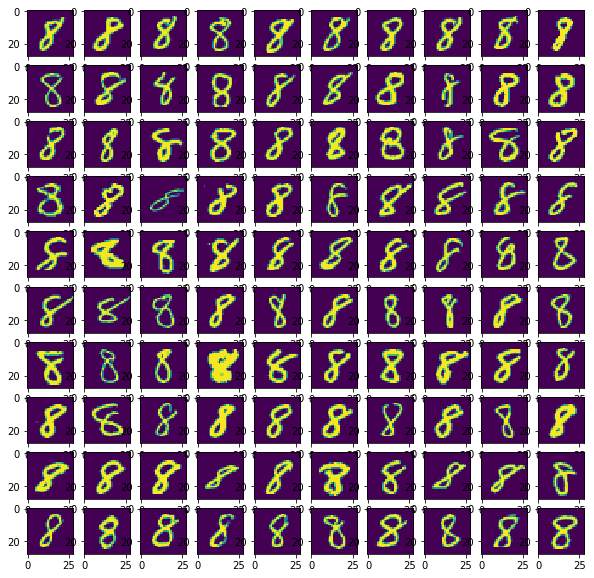

In [4]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (10, 10))
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(org_image[8][10*i+j])
plt.show()

In [6]:
image = {}
helper = [10, 10, 100, 100, 100, 300, 300, 1000, 1000, 1000]

for num in range(10):
    idxs = np.random.permutation(range(len(org_image[num])))
    image[num] = org_image[num][idxs[0:helper[num]]]
    print("The number of {} : {}".format(num, image[num].shape))

The number of 0 : (10, 28, 28)
The number of 1 : (10, 28, 28)
The number of 2 : (100, 28, 28)
The number of 3 : (100, 28, 28)
The number of 4 : (100, 28, 28)
The number of 5 : (300, 28, 28)
The number of 6 : (300, 28, 28)
The number of 7 : (1000, 28, 28)
The number of 8 : (1000, 28, 28)
The number of 9 : (1000, 28, 28)


In [7]:
img_train = np.concatenate((image[8], image[9]), axis=0)
label_train = np.concatenate((np.full((1000), 8), np.full((1000), 9)), axis=0)
img_train = np.concatenate((img_train, image[7]), axis=0)
label_train = np.concatenate((label_train, np.full((1000), 7)), axis=0)
for num in [5, 6]:
    for i in range(3):
        img_train = np.concatenate((img_train, image[num]), axis=0)
        append_label = np.full((len(image[num])), num)
        label_train = np.concatenate((label_train, append_label), axis=0)
for num in [2, 3, 4]:
    for i in range(10):
        img_train = np.concatenate((img_train, image[num]), axis=0)
        append_label = np.full((len(image[num])), num)
        label_train = np.concatenate((label_train, append_label), axis=0)
for num in [0, 1]:
    for i in range(100):
        img_train = np.concatenate((img_train, image[num]), axis=0)
        append_label = np.full((len(image[num])), num)
        label_train = np.concatenate((label_train, append_label), axis=0)

print(img_train.shape)
print(label_train.shape)

(9800, 28, 28)
(9800,)


In [7]:
img_train = np.concatenate((image[8], image[9]), axis=0)
for num in range(8):
    img_train = np.concatenate((img_train, image[num]), axis=0)

label_train = np.concatenate((np.full((1000), 8), np.full((1000), 9)), axis=0)
for num in range(8):
    append_label = np.full((len(image[num])), num)
    label_train = np.concatenate((label_train, append_label), axis=0)

idxs = np.random.permutation(range(len(img_train)))
img_train = img_train[idxs]
label_train = label_train[idxs]

print(img_train.shape)
print(label_train.shape)

(3920, 28, 28)
(3920,)


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


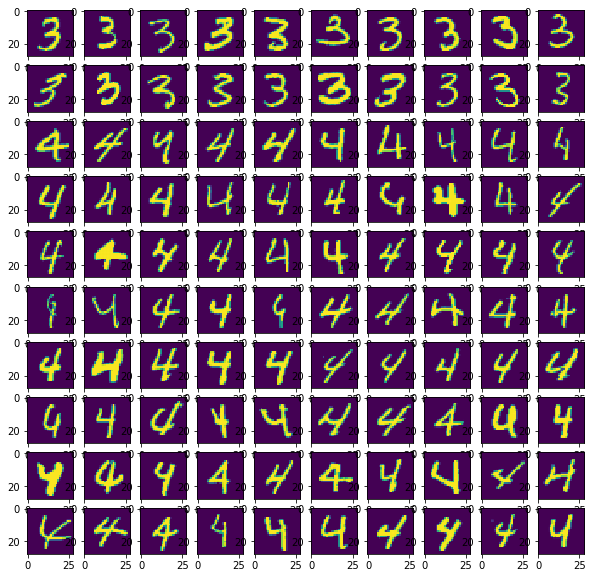

In [9]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (10, 10))
check = 2200
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(img_train[10*i+j + check])

    print(label_train[10*i + check : 10*(i+1) + check])
        
plt.show()

In [8]:
from keras.utils import np_utils

In [9]:
img_row, img_col = img_train.shape[1], img_train.shape[2]
img_depth = 1

img_train = img_train.reshape(img_train.shape[0], img_row, img_col, img_depth)
img_test = img_test.reshape(img_test.shape[0], img_row, img_col, img_depth)
img_train = img_train.astype('float32')
img_test = img_test.astype('float32')
img_train /= 255
img_test /= 255

label_train = np_utils.to_categorical(label_train, 10)
label_test = np_utils.to_categorical(label_test, 10)

In [10]:
X = tf.placeholder(tf.float32, [None, img_row, img_col, img_depth])
Y = tf.placeholder(tf.float32, [None, 10])
training = tf.placeholder(tf.bool)

with tf.variable_scope('conv_layer'):
    conv1 = tf.layers.conv2d(inputs=X, filters=32, kernel_size=[3, 3],
                            padding='SAME', activation=tf.nn.relu, name='conv1')
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], 
                                    padding='SAME', strides=2, name='pool1')
    conv2 = tf.layers.conv2d(inputs=pool1, filters=32, kernel_size=[3, 3],
                            padding='SAME', activation=tf.nn.relu, name='conv2')
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], 
                                    padding='SAME', strides=2, name='pool2')
    conv3 = tf.layers.conv2d(inputs=pool2, filters=32, kernel_size=[3, 3],
                            padding='SAME', activation=tf.nn.relu, name='conv3')
    pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], 
                                padding='SAME', strides=2, name='pool3')
with tf.variable_scope('fc_layer'):
    flat = tf.reshape(pool3, [-1, 4*4*32], name='flat')
    dense1 = tf.layers.dense(inputs=flat, units=1024, activation=tf.nn.relu, 
                             name='dense1')
    drop1 = tf.layers.dropout(inputs=dense1, rate=0.5, training=training)
    dense2 = tf.layers.dense(inputs=drop1, units=512, activation=tf.nn.relu, 
                             name='dense2')
    drop2 = tf.layers.dropout(inputs=dense2, rate=0.5, training=training)
    logits = tf.layers.dense(inputs=drop2, units=10)

In [11]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
def get_accuracy(sess, correct_prediction, img, label):
    if len(img) > 5000:
        num = int(len(img)/2)
        logit1 = sess.run(logits, feed_dict={X: img[0:num], Y: label[0:num], training: False})
        logit2 = sess.run(logits, feed_dict={X: img[num:num*2], Y: label[num:num*2], training: False})
        logit = np.concatenate((logit1, logit2), axis=0)
    else:
        num = len(img)
        logit = sess.run(logits, feed_dict={X: img, Y: label, training: False})
    
    equal = np.equal(np.argmax(logit, 1), np.argmax(label, 1))
    predict = equal.astype(np.float32)
    accuracy = np.mean(predict)
    
    return accuracy, predict, logit

In [13]:
# epochs 30
batch_size = 256
epochs = 30

print ('Learning Started.')

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(epochs):
    start = time.time()
    avg_cost = 0
    total_batch = int(img_train.shape[0] / batch_size)

    for i in range(total_batch):
        idxs = np.random.permutation(range(len(img_train)))
        idxs_i = idxs[i * batch_size: (i + 1) * batch_size]
        feed_dict = {X: img_train[idxs_i], Y: label_train[idxs_i], training: True}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print ('Epoch : {:02d} , Cost : {:.5f}'.format(epoch + 1, avg_cost))
    print ('Train Accuracy : {:.5f}'.format(sess.run(accuracy, feed_dict={X: img_train, Y: label_train, training: False})))
    test_accuracy, _, _ = get_accuracy(sess, correct_prediction, img_test, label_test)
    print ('Test Accuracy : {:.5f}'.format(test_accuracy))
    print ('Elapsed time : {:.5f}'.format(time.time() - start))

Learning Started.
Epoch : 01 , Cost : 1.72033
Train Accuracy : 0.66633
Test Accuracy : 0.26550
Elapsed time : 1.69620
Epoch : 02 , Cost : 0.83575
Train Accuracy : 0.85204
Test Accuracy : 0.46150
Elapsed time : 0.57556
Epoch : 03 , Cost : 0.43205
Train Accuracy : 0.91709
Test Accuracy : 0.60460
Elapsed time : 0.56668
Epoch : 04 , Cost : 0.28599
Train Accuracy : 0.94821
Test Accuracy : 0.67300
Elapsed time : 0.57986
Epoch : 05 , Cost : 0.20863
Train Accuracy : 0.95281
Test Accuracy : 0.70330
Elapsed time : 0.58990
Epoch : 06 , Cost : 0.15781
Train Accuracy : 0.96531
Test Accuracy : 0.72460
Elapsed time : 0.58182
Epoch : 07 , Cost : 0.12651
Train Accuracy : 0.97168
Test Accuracy : 0.76330
Elapsed time : 0.58949
Epoch : 08 , Cost : 0.09808
Train Accuracy : 0.97679
Test Accuracy : 0.80490
Elapsed time : 0.59010
Epoch : 09 , Cost : 0.08388
Train Accuracy : 0.98112
Test Accuracy : 0.86260
Elapsed time : 0.58648
Epoch : 10 , Cost : 0.08117
Train Accuracy : 0.98699
Test Accuracy : 0.84480
Elaps

In [13]:
# oversampling

batch_size = 256
epochs = 30

print ('Learning Started.')

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(epochs):
    start = time.time()
    avg_cost = 0
    total_batch = int(img_train.shape[0] / batch_size)

    for i in range(total_batch):
        idxs = np.random.permutation(range(len(img_train)))
        idxs_i = idxs[i * batch_size: (i + 1) * batch_size]
        feed_dict = {X: img_train[idxs_i], Y: label_train[idxs_i], training: True}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print ('Epoch : {:02d} , Cost : {:.5f}'.format(epoch + 1, avg_cost))
    #print ('Train Accuracy : {:.5f}'.format(sess.run(accuracy, feed_dict={X: img_train, Y: label_train, training: False})))
    test_accuracy, _, _ = get_accuracy(sess, correct_prediction, img_test, label_test)
    print ('Test Accuracy : {:.5f}'.format(test_accuracy))
    print ('Elapsed time : {:.5f}'.format(time.time() - start))

Learning Started.
Epoch : 01 , Cost : 1.04751
Test Accuracy : 0.90280
Elapsed time : 1.88454
Epoch : 02 , Cost : 0.19266
Test Accuracy : 0.94250
Elapsed time : 1.01499
Epoch : 03 , Cost : 0.12211
Test Accuracy : 0.94020
Elapsed time : 0.99074
Epoch : 04 , Cost : 0.07108
Test Accuracy : 0.93830
Elapsed time : 1.03004
Epoch : 05 , Cost : 0.05599
Test Accuracy : 0.95700
Elapsed time : 1.04732
Epoch : 06 , Cost : 0.03787
Test Accuracy : 0.95130
Elapsed time : 1.01710
Epoch : 07 , Cost : 0.03198
Test Accuracy : 0.95650
Elapsed time : 1.02625
Epoch : 08 , Cost : 0.02376
Test Accuracy : 0.95510
Elapsed time : 1.04791
Epoch : 09 , Cost : 0.02234
Test Accuracy : 0.95280
Elapsed time : 1.02650
Epoch : 10 , Cost : 0.02393
Test Accuracy : 0.95600
Elapsed time : 1.00395
Epoch : 11 , Cost : 0.01585
Test Accuracy : 0.95600
Elapsed time : 0.98866
Epoch : 12 , Cost : 0.01144
Test Accuracy : 0.94660
Elapsed time : 0.98485
Epoch : 13 , Cost : 0.00984
Test Accuracy : 0.95820
Elapsed time : 0.98653
Epoch :

In [15]:
num = 0
specific_label = np_utils.to_categorical(np.full((len(test_img[num])), num), 10)
specific_test_accuracy, test_predict, test_logit = get_accuracy(sess, correct_prediction, np.expand_dims(test_img[num], axis=-1), 
                                                                specific_label)
print(specific_test_accuracy)

0.805102


failed prediction
[5 5 8 6 8 5 5 8 8 6]
[6 9 8 6 6 5 8 8 8 8]
[6 8 8 6 6 2 8 6 6 2]
[9 1 8 6 8 8 6 2 6 8]
[8 6 8 6 8 8 6 5 6 8]
[6 6 5 6 9 8 6 6 6 8]
[8 8 6 6 2 8 5 6 5 8]
[2 8 6 5 8 5 1 6 5 9]
[9 8 8 5 8 8 6 8 6 6]
[8 8 8 5 6 6 5 8 6 6]


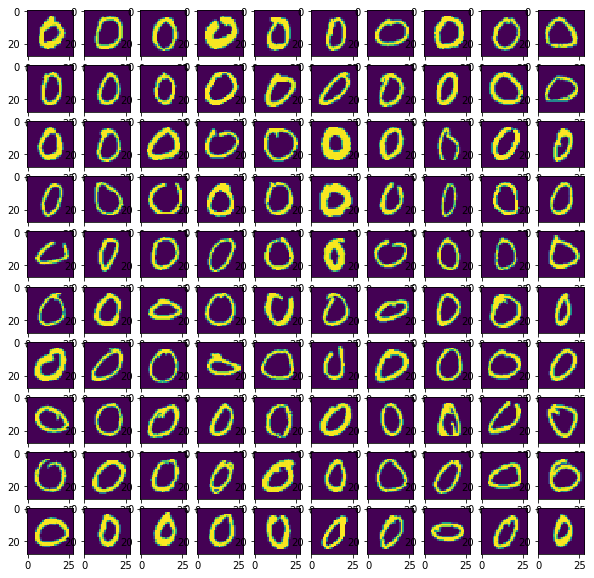

In [16]:
logit = np.argmax(test_logit, 1)
indx = np.where(test_predict[:] == 0.)[0]
fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (10, 10))
img = test_img[num]
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(img[10*i+j])
logit = logit[indx]
label = np.argmax(label_test, 1)
label = label[indx]
print("failed prediction")
for i in range(10):
    print(logit[i*10:(i+1)*10])
plt.show()

In [17]:
num = 1
specific_label = np_utils.to_categorical(np.full((len(test_img[num])), num), 10)
specific_test_accuracy, test_predict, test_logit = get_accuracy(sess, correct_prediction, np.expand_dims(test_img[num], axis=-1), 
                                                                specific_label)
print(specific_test_accuracy)

0.923348


failed prediction
[7 8 7 3 6 8 6 7 7 4]
[8 7 7 2 7 6 7 2 8 8]
[8 8 8 2 2 7 8 2 2 8]
[8 8 7 2 7 4 7 6 8 8]
[7 8 8 8 8 8 8 8 3 7]
[8 8 6 8 8 8 8 8 8 8]
[8 8 8 8 8 8 8 8 8 8]
[8 8 8 8 6 8 8 8 8 8]
[8 8 8 8 8 7 7]
[]


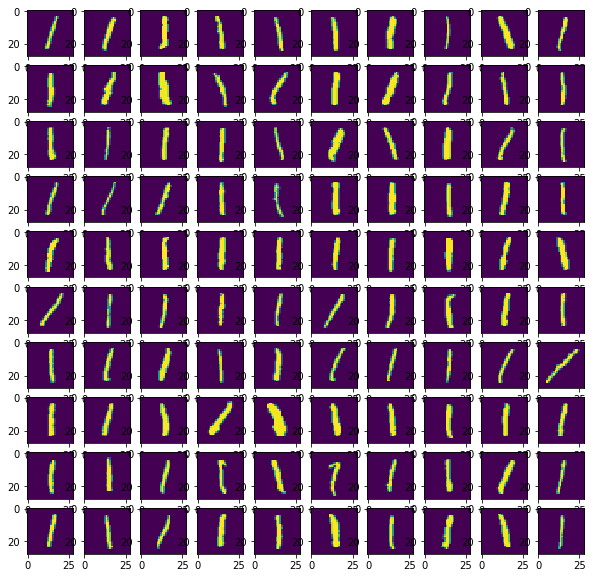

In [18]:
logit = np.argmax(test_logit, 1)
indx = np.where(test_predict[:] == 0.)[0]
fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (10, 10))
img = test_img[num]
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(img[10*i+j])
logit = logit[indx]
label = np.argmax(label_test, 1)
label = label[indx]
print("failed prediction")
for i in range(10):
    print(logit[i*10:(i+1)*10])
plt.show()

In [19]:
# epochs 30

for num in range(10):
    specific_label = np_utils.to_categorical(np.full((len(test_img[num])), num), 10)
    specific_test_accuracy, test_predict, test_logit = get_accuracy(sess, correct_prediction, np.expand_dims(test_img[num], axis=-1), 
                                                                    specific_label)
    print("The specific accurcy of {} : {:.5f}".format(num, specific_test_accuracy))
acc, _, _ = get_accuracy(sess, correct_prediction, img_test, label_test)
print("Total accuracy : {:.5f}".format(acc))

The specific accurcy of 0 : 0.80510
The specific accurcy of 1 : 0.92335
The specific accurcy of 2 : 0.94574
The specific accurcy of 3 : 0.92871
The specific accurcy of 4 : 0.91242
The specific accurcy of 5 : 0.97309
The specific accurcy of 6 : 0.96868
The specific accurcy of 7 : 0.98249
The specific accurcy of 8 : 0.99589
The specific accurcy of 9 : 0.97423
Total accuracy : 0.94440


In [39]:
num = 3
specific_label = np_utils.to_categorical(np.full((len(test_img[num])), num), 10)
specific_test_accuracy, test_predict, test_logit = get_accuracy(sess, correct_prediction, np.expand_dims(test_img[num], axis=-1), 
                                                                specific_label)
print(specific_test_accuracy)

0.876238


failed prediction
[5 5 7 5 5 5 7 5 2 9]
[5 8 5 8 8 2 9 7 5 8]
[7 5 7 2 8 5 8 5 5 8]
[7 5 5 5 7 5 7 5 5 5]
[5 5 5 5 2 5 5 8 7 2]
[7 5 5 5 8 5 8 7 8 8]
[7 9 2 8 5 7 8 5 2 7]
[5 9 7 5 2 5 8 5 7 8]
[8 8 5 7 5 9 9 9 5 9]
[5 5 8 8 8 5 2 5 5 8]


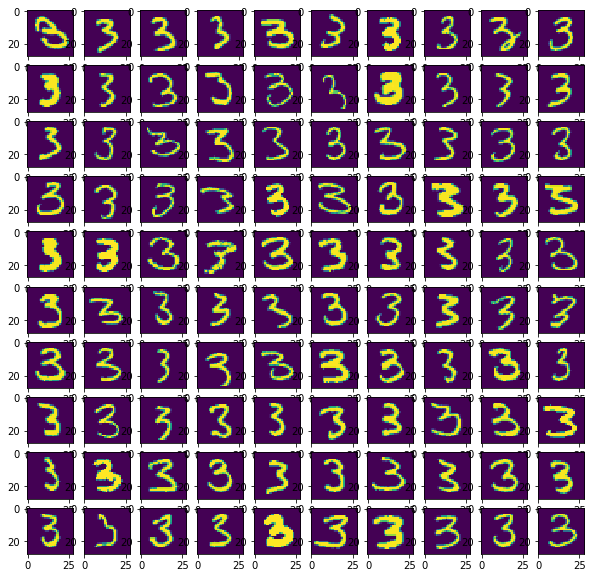

In [40]:
logit = np.argmax(test_logit, 1)
indx = np.where(test_predict[:] == 0.)[0]
fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (10, 10))
img = test_img[num]
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(img[10*i+j])
logit = logit[indx]
label = np.argmax(label_test, 1)
label = label[indx]
print("failed prediction")
for i in range(10):
    print(logit[i*10:(i+1)*10])
plt.show()

0.959184
failed prediction
[6 5 2 8 6 8 2 2 8 2]
[2 9 6 8 9 7 2 6 2 8]
[6 8 8 2 7 8 8 2 2 2]
[2 2 2 2 2 6 2 2 2 2]
[]
[]
[]
[]
[]
[]


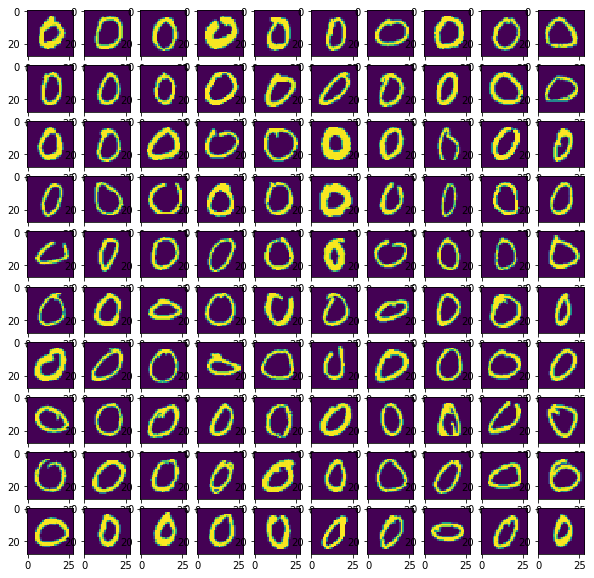

In [14]:
num = 0
specific_label = np_utils.to_categorical(np.full((len(test_img[num])), num), 10)
specific_test_accuracy, test_predict, test_logit = get_accuracy(sess, correct_prediction, np.expand_dims(test_img[num], axis=-1), 
                                                                specific_label)
print(specific_test_accuracy)

logit = np.argmax(test_logit, 1)
indx = np.where(test_predict[:] == 0.)[0]
fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (10, 10))
img = test_img[num]
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(img[10*i+j])
logit = logit[indx]

print("failed prediction")
for i in range(10):
    print(logit[i*10:(i+1)*10])
plt.show()

0.904846
failed prediction
[8 8 9 8 2 8 8 7 3 6]
[8 6 6 8 6 8 2 2 2 7]
[7 8 2 6 7 2 8 8 8 2]
[8 8 2 8 2 7 2 6 8 8]
[6 2 2 7 2 8 2 2 8 8]
[8 8 8 8 8 8 2 2 2 2]
[2 2 6 2 2 2 2 8 2 2]
[8 2 2 2 8 2 2 2 2 2]
[8 8 8 6 2 2 2 2 2 2]
[2 2 8 8 8 8 2 2 8 8]


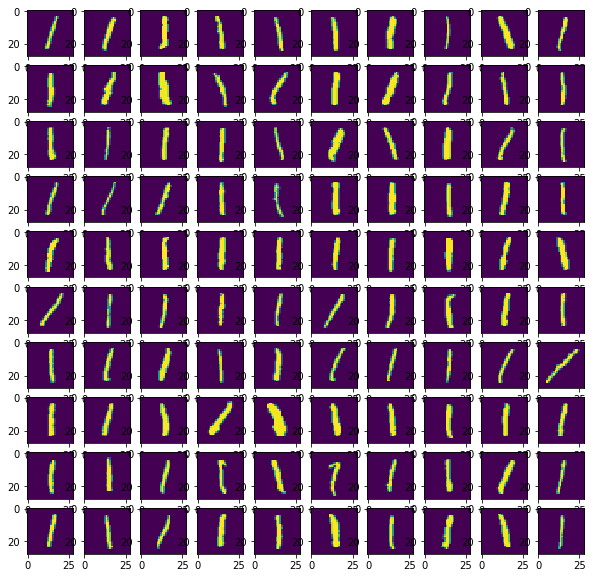

In [15]:
num = 1
specific_label = np_utils.to_categorical(np.full((len(test_img[num])), num), 10)
specific_test_accuracy, test_predict, test_logit = get_accuracy(sess, correct_prediction, np.expand_dims(test_img[num], axis=-1), 
                                                                specific_label)
print(specific_test_accuracy)

logit = np.argmax(test_logit, 1)
indx = np.where(test_predict[:] == 0.)[0]
fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (10, 10))
img = test_img[num]
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(img[10*i+j])
logit = logit[indx]

print("failed prediction")
for i in range(10):
    print(logit[i*10:(i+1)*10])
plt.show()

In [24]:
# oversampling

for num in range(10):
    specific_label = np_utils.to_categorical(np.full((len(test_img[num])), num), 10)
    specific_test_accuracy, test_predict, test_logit = get_accuracy(sess, correct_prediction, np.expand_dims(test_img[num], axis=-1), 
                                                                    specific_label)
    print("The specific accurcy of {} : {:.5f}".format(num, specific_test_accuracy))
acc, _, _ = get_accuracy(sess, correct_prediction, img_test, label_test)
print("Total accuracy : {:.5f}".format(acc))

The specific accurcy of 0 : 0.95918
The specific accurcy of 1 : 0.90485
The specific accurcy of 2 : 0.98643
The specific accurcy of 3 : 0.86238
The specific accurcy of 4 : 0.92770
The specific accurcy of 5 : 0.98094
The specific accurcy of 6 : 0.98956
The specific accurcy of 7 : 0.97860
The specific accurcy of 8 : 0.97741
The specific accurcy of 9 : 0.98315
Total accuracy : 0.95520


failed prediction
[5 5 7 5 5 5 7 5 2 9]
[5 8 5 8 8 2 9 7 5 8]
[7 5 7 2 8 5 8 5 5 8]
[7 5 5 5 7 5 7 5 5 5]
[5 5 5 5 2 5 5 8 7 2]
[7 5 5 5 8 5 8 7 8 8]
[7 9 2 8 5 7 8 5 2 7]
[5 9 7 5 2 5 8 5 7 8]
[8 8 5 7 5 9 9 9 5 9]
[5 5 8 8 8 5 2 5 5 8]


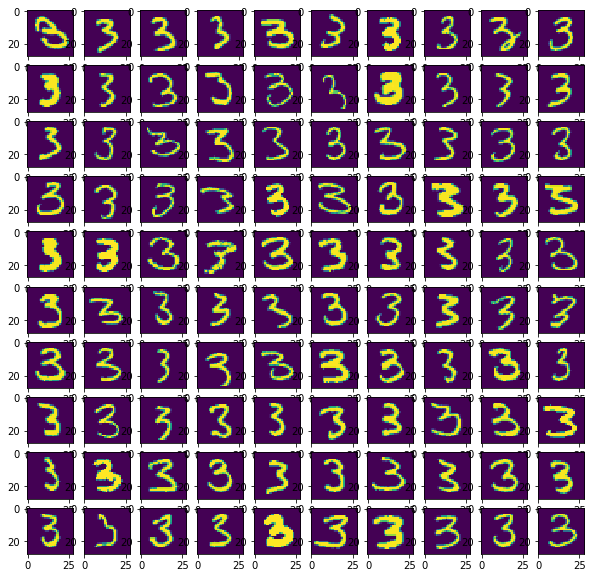

In [40]:
logit = np.argmax(test_logit, 1)
indx = np.where(test_predict[:] == 0.)[0]
fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (10, 10))
img = test_img[num]
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(img[10*i+j])
logit = logit[indx]
label = np.argmax(label_test, 1)
label = label[indx]
print("failed prediction")
for i in range(10):
    print(logit[i*10:(i+1)*10])
plt.show()

In [20]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [13]:
test_accuracy, test_predcit, test_logit = get_accuracy(sess, correct_prediction, img_test, label_test)

In [15]:
test_accuracy

0.94950002

In [39]:
test_logit = softmax(test_logit[indx][0])

In [40]:
a = test_logit

In [41]:
a

array([  1.23926171e-03,   9.26752909e-05,   5.33781131e-04,
         8.02016817e-04,   2.91928649e-04,   8.27100407e-03,
         5.93720786e-02,   5.08414951e-06,   9.28149641e-01,
         1.24251668e-03], dtype=float32)

In [26]:
np.argmax(a, 0)

7

In [28]:
np.sum(a)

0.0046511726

failed prediction
[5 6 8 8 5 8 7 9 8 2]
[8 7 5 3 2 0 7 5 8 7]
[8 9 5 5 5 7 6 8 7 5]
[5 5 8 9 2 7 8 6 8 9]
[8 8 6 3 8 7 6 8 9 9]
[8 5 8 9 8 8 8 2 3 9]
[7 8 5 7 9 6 9 8 8 8]
[5 3 8 9 5 6 8 6 7 5]
[8 8 5 7 8 2 8 9 7 9]
[6 8 5 7 8 5 8 3 1 9]
corresponding label
[3 4 1 1 9 1 1 4 1 0]
[1 3 6 2 4 6 2 0 1 3]
[4 8 6 3 3 3 0 4 0 3]
[6 3 0 4 8 2 1 0 1 3]
[1 2 0 7 1 1 0 2 4 4]
[1 6 1 0 1 4 1 0 1 4]
[2 2 3 2 8 1 4 1 1 1]
[6 7 6 3 3 4 3 0 3 6]
[4 6 0 3 1 7 1 4 2 4]
[0 0 3 5 1 8 2 5 0 4]


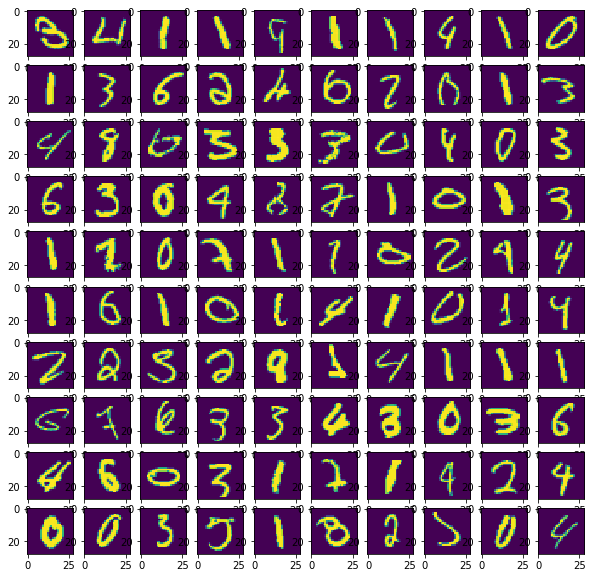

In [14]:
logit = np.argmax(test_logit, 1)
indx = np.where(test_predcit[:] == 0.)[0]
fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (10, 10))
img = img_test[indx, :]
img = np.squeeze(img, axis=-1)
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(img[10*i+j])
logit = logit[indx]
label = np.argmax(label_test, 1)
label = label[indx]
print("failed prediction")
for i in range(10):
    print(logit[i*10:(i+1)*10])
print("corresponding label")
for i in range(10):
    print(label[i*10:(i+1)*10])
plt.show()

In [22]:
test_logit[indx][0:100]

array([[  4.27920317e-17,   3.20009875e-18,   1.84316024e-17,
          2.76938216e-17,   1.00803629e-17,   2.85599631e-16,
          2.05012996e-15,   1.75557000e-19,   3.20491890e-14,
          4.29043231e-17],
       [  7.54463946e-16,   6.18388116e-17,   4.82469073e-17,
          9.56060138e-22,   1.08160811e-12,   3.65917737e-17,
          8.62995005e-12,   6.88502253e-18,   2.01598197e-20,
          3.42334093e-20],
       [  1.25231712e-17,   4.69135074e-16,   8.14945354e-17,
          2.97119272e-17,   1.39169446e-16,   1.53604015e-17,
          7.55434076e-17,   1.29012945e-17,   6.99653873e-15,
          1.19058769e-17],
       [  1.54735532e-17,   3.61911725e-15,   1.37722382e-16,
          1.28811264e-18,   3.01639384e-17,   1.96380742e-18,
          1.47697431e-15,   3.26378612e-19,   7.78724795e-13,
          1.06281500e-18],
       [  5.14601260e-18,   5.06045565e-18,   4.30424724e-19,
          3.01686397e-18,   5.95749104e-14,   4.36446630e-18,
          6.54954082e-18

failed prediction
[8 6 8 8 9 9 8 6 6 7]
[2 7 4 6 7 7 6 7 7 7]
[7 6 2 7 5 8 8 5 6 6]
[3 8 7 6 8 6 9 9 9 7]
[8 6 7 8 5 7 9 9 2 8]
[5 7 3 7 5 6 8 6 7 5]
[7 6 2 4 9 5 7 9 5 7]
[6 3 7 6 7 6 8 5 7 6]
[8 6 8 7 6 7 8 7 7 7]
[7 8 5 7 6 8 8 6 4 4]
corresponding label
[3 4 1 1 4 2 1 4 8 2]
[3 3 9 0 3 3 0 4 1 3]
[3 0 8 2 0 2 1 0 2 0]
[7 1 1 0 5 0 4 4 0 9]
[3 0 2 2 3 2 8 5 1 1]
[6 2 7 3 3 4 3 0 3 0]
[3 2 7 9 4 9 2 4 3 5]
[5 5 2 1 2 0 3 1 8 4]
[2 0 3 3 0 4 1 1 2 3]
[2 1 9 2 1 1 2 0 1 1]


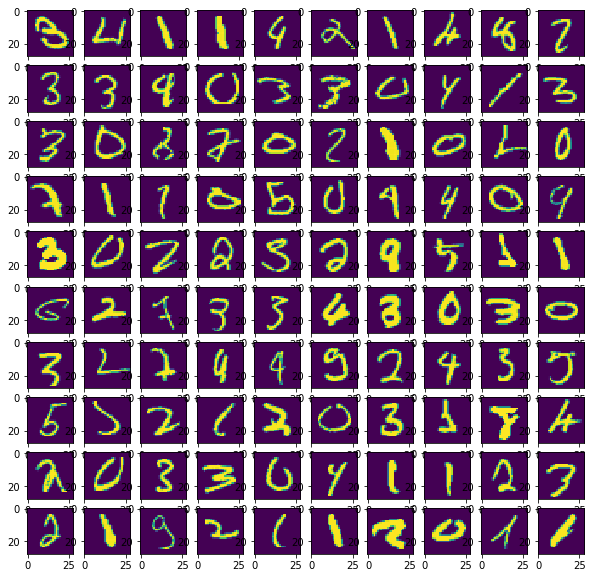

In [17]:
logit = np.argmax(test_logit, 1)
indx = np.where(test_predcit[:] == 0.)[0]
fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (10, 10))
img = img_test[indx, :]
img = np.squeeze(img, axis=-1)
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(img[10*i+j])
logit = logit[indx]
label = np.argmax(label_test, 1)
label = label[indx]
print("failed prediction")
for i in range(10):
    print(logit[i*10:(i+1)*10])
print("corresponding label")
for i in range(10):
    print(label[i*10:(i+1)*10])
plt.show()

failed prediction
[4 8 2 9 7 7 5 8 7 9]
[9 9 9 9 6 5 3 8 0 7]
[7 6 6 5 6 7 2 6 8 5]
[9 6 8 8 6 2 7 5 6 7]
[8 8 7 7 8 2 6 7 3 6]
[8 8 6 8 7 2 7 7 6 5]
[8 7 5 5 7 6 7 8 5 7]
[7 2 9 2 9 9 6 8 9 7]
[7 9 8 6 8 7 7 8 7 4]
[9 8 6 8 7 5 8 7 6 4]
corresponding label
[9 3 3 0 1 1 0 4 2 4]
[3 5 4 4 0 3 1 0 2 9]
[1 5 1 3 9 1 1 0 1 3]
[4 0 1 3 5 3 9 3 0 2]
[1 0 4 9 5 3 0 3 2 0]
[1 1 0 1 3 3 3 5 0 9]
[0 3 3 3 2 0 9 6 0 1]
[9 1 5 1 0 4 0 2 7 5]
[2 4 0 1 1 2 3 9 2 6]
[4 4 0 3 0 9 1 2 1 5]


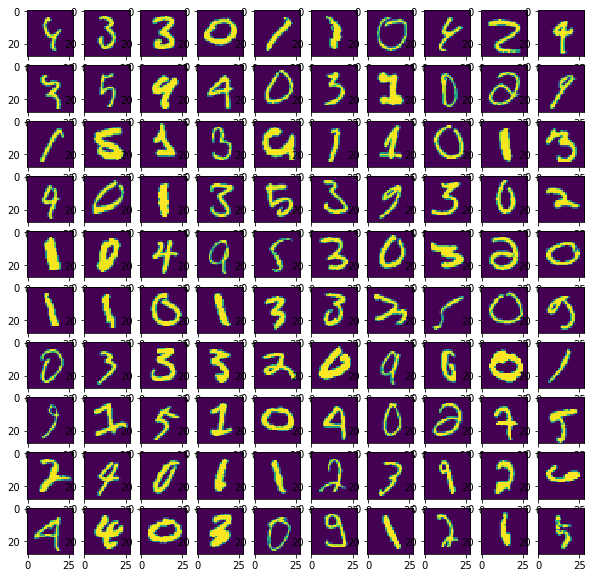

In [18]:
logit = np.argmax(test_logit, 1)
indx = np.where(test_predcit[:] == 0.)[0]
fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (10, 10))
img = img_test[indx, :]
img = np.squeeze(img, axis=-1)
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(img[10*i+j + 100])
logit = logit[indx]
label = np.argmax(label_test, 1)
label = label[indx]
print("failed prediction")
for i in range(10):
    print(logit[i*10 + 100:(i+1)*10 + 100])
print("corresponding label")
for i in range(10):
    print(label[i*10 + 100:(i+1)*10 + 100])
plt.show()

In [8]:
# baseline
batch_size = 256
epochs = 30

print ('Learning Started.')

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(epochs):
    start = time.time()
    avg_cost = 0
    total_batch = int(img_train.shape[0] / batch_size)

    for i in range(total_batch):
        idxs = np.random.permutation(range(len(img_train)))
        idxs_i = idxs[i * batch_size: (i + 1) * batch_size]
        feed_dict = {X: img_train[idxs_i], Y: label_train[idxs_i]}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print ('Epoch : {:02d} , Cost : {:.5f}'.format(epoch + 1, avg_cost))
    #print ('Train Accuracy : {:.5f}'.format(sess.run(accuracy, feed_dict={X: img_train, Y: label_train})))
    test_accuracy, _, _ = get_accuracy(sess, correct_prediction, img_test, label_test)
    print ('Test Accuracy : {:.5f}'.format(test_accuracy))
    print ('Elapsed time : {:.5f}'.format(time.time() - start))

Learning Started.
Epoch : 01 , Cost : 0.32698
Test Accuracy : 0.95780
Elapsed time : 7.19860
Epoch : 02 , Cost : 0.07609
Test Accuracy : 0.97600
Elapsed time : 6.06663
Epoch : 03 , Cost : 0.05539
Test Accuracy : 0.97780
Elapsed time : 5.72429
Epoch : 04 , Cost : 0.04113
Test Accuracy : 0.98280
Elapsed time : 5.84244
Epoch : 05 , Cost : 0.03369
Test Accuracy : 0.98540
Elapsed time : 5.72335
Epoch : 06 , Cost : 0.03214
Test Accuracy : 0.98560
Elapsed time : 5.68448
Epoch : 07 , Cost : 0.02631
Test Accuracy : 0.98680
Elapsed time : 7.14878
Epoch : 08 , Cost : 0.02321
Test Accuracy : 0.98780
Elapsed time : 7.13017
Epoch : 09 , Cost : 0.02222
Test Accuracy : 0.98540
Elapsed time : 6.67527
Epoch : 10 , Cost : 0.01998
Test Accuracy : 0.98620
Elapsed time : 7.40954
Epoch : 11 , Cost : 0.01807
Test Accuracy : 0.98500
Elapsed time : 6.91082
Epoch : 12 , Cost : 0.01586
Test Accuracy : 0.98500
Elapsed time : 5.79955
Epoch : 13 , Cost : 0.01518
Test Accuracy : 0.98900
Elapsed time : 5.92622
Epoch :